In [1]:
#Import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read in csv file
region_path = "Resources/region.csv"
region = pd.read_csv(region_path)
region

,Country,Year,Region,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Eastern Mediterranean,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Eastern Mediterranean,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Eastern Mediterranean,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Eastern Mediterranean,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Eastern Mediterranean,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Africa,Developing,44.3,723.0,27,4.36,0.000000,68.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Africa,Developing,44.5,715.0,26,4.06,0.000000,7.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Africa,Developing,44.8,73.0,25,4.43,0.000000,73.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Africa,Developing,45.3,686.0,25,1.72,0.000000,76.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
#list of column names
# region.rename(columns={" BMI ": "BMI"})
# region.drop([' BMI '], axis=1)
sorted(region)

[' HIV/AIDS',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Adult Mortality',
 'Alcohol',
 'BMI',
 'Country',
 'Diphtheria ',
 'GDP',
 'Hepatitis B',
 'Income composition of resources',
 'Life expectancy',
 'Measles ',
 'Polio',
 'Population',
 'Region',
 'Schooling',
 'Status',
 'Total expenditure',
 'Year',
 'infant deaths',
 'percentage expenditure',
 'under-five deaths ']

In [4]:
#Subset data for analyzing adult mortality vs BMI
#country, year, status, adult mortality, BMI, GDP
life_exp_df = region[["Country", "Region" ,"Year", "Status", "Life expectancy", "BMI", "GDP"]]
life_exp_df

,Country,Region,Year,Status,Life expectancy,BMI,GDP
0,Afghanistan,Eastern Mediterranean,2015,Developing,65.0,19.1,584.259210
1,Afghanistan,Eastern Mediterranean,2014,Developing,59.9,18.6,612.696514
2,Afghanistan,Eastern Mediterranean,2013,Developing,59.9,18.1,631.744976
3,Afghanistan,Eastern Mediterranean,2012,Developing,59.5,17.6,669.959000
4,Afghanistan,Eastern Mediterranean,2011,Developing,59.2,17.2,63.537231
...,...,...,...,...,...,...,...
2933,Zimbabwe,Africa,2004,Developing,44.3,27.1,454.366654
2934,Zimbabwe,Africa,2003,Developing,44.5,26.7,453.351155
2935,Zimbabwe,Africa,2002,Developing,44.8,26.3,57.348340
2936,Zimbabwe,Africa,2001,Developing,45.3,25.9,548.587312


In [37]:
# Clean df for BMI vs Adult Mortality (may include 3rd dimension later on in this section)
life_df = life_exp_df.dropna(axis=0, subset=['BMI', 'Life expectancy'])
life_df
#find missing countries

,Country,Region,Year,Status,Life expectancy,BMI,GDP
0,Afghanistan,Eastern Mediterranean,2015,Developing,65.0,19.1,584.259210
1,Afghanistan,Eastern Mediterranean,2014,Developing,59.9,18.6,612.696514
2,Afghanistan,Eastern Mediterranean,2013,Developing,59.9,18.1,631.744976
3,Afghanistan,Eastern Mediterranean,2012,Developing,59.5,17.6,669.959000
4,Afghanistan,Eastern Mediterranean,2011,Developing,59.2,17.2,63.537231
...,...,...,...,...,...,...,...
2933,Zimbabwe,Africa,2004,Developing,44.3,27.1,454.366654
2934,Zimbabwe,Africa,2003,Developing,44.5,26.7,453.351155
2935,Zimbabwe,Africa,2002,Developing,44.8,26.3,57.348340
2936,Zimbabwe,Africa,2001,Developing,45.3,25.9,548.587312


In [51]:
grouped_df= life_df.groupby(['Country']).mean()
grouped_df = grouped_df[['Life expectancy', 'BMI']]
grouped_df

,Life expectancy,BMI
Country,,
Afghanistan,58.19375,15.51875
Albania,75.15625,49.06875
Algeria,73.61875,48.74375
Angola,49.01875,18.01875
Antigua and Barbuda,75.05625,38.42500
...,...,...
Venezuela (Bolivarian Republic of),73.38750,54.48750
Viet Nam,74.77500,11.18750
Yemen,63.86250,33.48750


In [43]:
# gdp_copy = grouped_df.dropna(axis=0, subset=['GDP'])
# gdp_copy

,Life expectancy,BMI,GDP
Country,,,
Afghanistan,58.19375,15.51875,340.015425
Albania,75.15625,49.06875,2119.726679
Algeria,73.61875,48.74375,2847.853392
Angola,49.01875,18.01875,1975.143045
Antigua and Barbuda,75.05625,38.42500,9759.305728
...,...,...,...
Uruguay,76.07500,52.92500,7192.584875
Uzbekistan,68.03125,34.80625,651.092359
Vanuatu,71.38750,44.25625,2000.245518


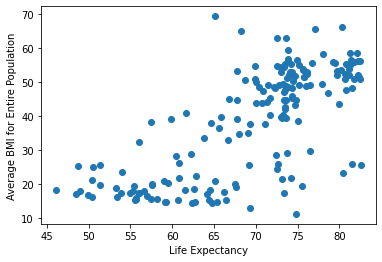

In [9]:
life_exp = grouped_df['Life expectancy']
bmi = grouped_df.BMI
plt.scatter(life_exp,bmi)
plt.xlabel("Life Expectancy")
plt.ylabel("Average BMI for Entire Population")
plt.show()

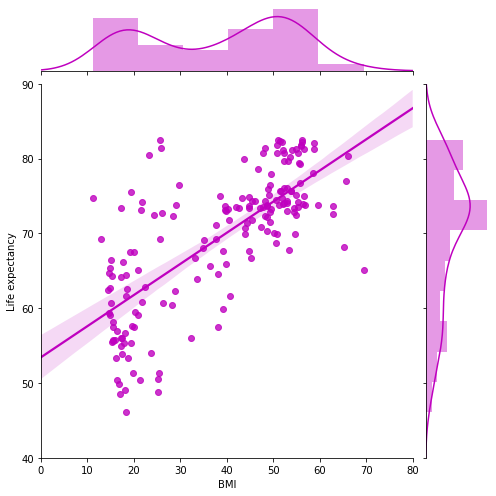

In [31]:
import seaborn as sns
#sns.set_theme(style="darkgrid")

g = sns.jointplot(x="BMI", y="Life expectancy", data=grouped_df,
                  kind="reg", truncate=False,
                  xlim=(0, 80), ylim=(40, 90),
                  color="m", height=7)
#the light pink shade around the linear regression line is a 95% CI of the population parameter
#mu, based on the sample, for life expectancy at each BMI along the x-axis 

#NOTE: it should be noted that this is an extensive dataframe that 'covers' the population,
#but we not only took the mean over a 15 year period which can have a strong effect on the mean given 
#it is not a robust statistic and we cannot be assume that everyone who was counted is still alive and 
#that no more people have been born since 2015, thus this is a rough estimation of the global population's global 
#life expectancies and bmi by country

In [34]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(grouped_df['Life expectancy'], grouped_df.BMI)
r_value
#intercept not meaningful for this regression

0.7238242629415409

In [57]:
#analysis by cleaned gdp 
#grouped by lower and higher bmi averages to review bmi inpact on life expectancy
lwr_bmi_df = grouped_df[grouped_df.BMI < 32]
lwr_bmi_df.head()


,Life expectancy,BMI
Country,,
Afghanistan,58.19375,15.51875
Angola,49.01875,18.01875
Bangladesh,69.30000,12.87500
Benin,57.56875,19.61250
Bhutan,66.16250,17.58125


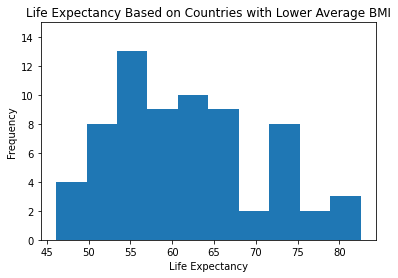

In [83]:
#graph of lower BMI life expectancy distribution (histogram)
plt.hist(lwr_bmi_df['Life expectancy'])
plt.title("Life Expectancy Based on Countries with Lower Average BMI")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.ylim([0, 15])
plt.show()

In [36]:
upr_bmi_df = grouped_df[grouped_df.BMI >= 32]
upr_bmi_df

,Life expectancy,BMI
Country,,
Albania,75.15625,49.06875
Algeria,73.61875,48.74375
Antigua and Barbuda,75.05625,38.42500
Argentina,75.15625,54.98125
Armenia,73.40000,44.70625
...,...,...
Uruguay,76.07500,52.92500
Uzbekistan,68.03125,34.80625
Vanuatu,71.38750,44.25625


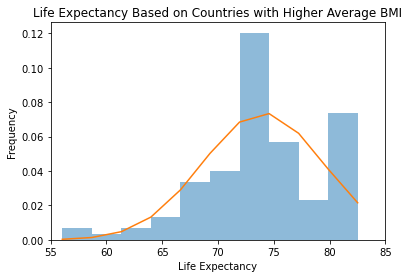

In [85]:
#graph higher BMI life expectancy distribution (histogram)
# plt.hist(upr_bmi_df['Life expectancy'])
plt.title("Life Expectancy Based on Countries with Higher Average BMI")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
mu = np.mean(upr_bmi_df['Life expectancy'])
sigma = np.std(upr_bmi_df['Life expectancy'])
_, bins, _ = plt.hist(upr_bmi_df['Life expectancy'], 10, density=1, alpha=0.5)

best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.xlim([55, 85])
plt.show()

In [70]:
best_fit_line = scipy.stats.norm.pdf(upr_bmi_df['Life expectancy'], mu, sigma)
best_fit_line

array([0.07215043, 0.07353416, 0.07241726, 0.07215043, 0.07325083,
       0.02617382, 0.02853167, 0.06126093, 0.07365651, 0.07019385,
       0.07360532, 0.05518238, 0.0346005 , 0.05009728, 0.03727368,
       0.06913732, 0.00029529, 0.07322102, 0.07202115, 0.02705168,
       0.04460987, 0.07305901, 0.05163083, 0.068426  , 0.05649484,
       0.04275093, 0.06484853, 0.04621117, 0.07026273, 0.0731295 ,
       0.0661275 , 0.06746483, 0.07268893, 0.04552526, 0.03435492,
       0.02342623, 0.0734033 , 0.03079723, 0.03046886, 0.07307048,
       0.06739892, 0.02216404, 0.00240258, 0.07241274, 0.07369187,
       0.02197723, 0.07370645, 0.05858776, 0.03885562, 0.02986311,
       0.02363167, 0.07365235, 0.07239674, 0.0299428 , 0.01919571,
       0.07370091, 0.04856435, 0.07363341, 0.07370451, 0.07082064,
       0.07189231, 0.03381679, 0.03713708, 0.07021928, 0.04129483,
       0.02378503, 0.07346004, 0.06946787, 0.0311271 , 0.02958536,
       0.07332606, 0.02630455, 0.07290479, 0.06649062, 0.00545